## Imports

In [1]:
import random
import numpy
import matplotlib.pyplot as plt

## Genetic Algorithm Class

In [2]:
class GeneticTSP:
  def __init__(self, generations, population_size,
               elitist_rate, mutation_rate):
    self.cities = set()
    self.paths = []
    self.population = []
    self.population_size = population_size
    self.elitist_rate = elitist_rate
    self.generations = generations
    self.mutation_rate = mutation_rate

  def add_path(self, city1, city2, distance):
    self.cities.add(city1)
    self.cities.add(city2)
    self.paths.append(({city1, city2}, distance))

  def create_chromosome(self):
    chromosome = list(self.cities)
    random.shuffle(chromosome)
    return chromosome

  def create_population(self):
    for _ in range(self.population_size):
      chromosome = self.create_chromosome()
      self.population.append(chromosome)

  def distance(self, src, dst):
    for path, distance in self.paths:
      if src in path and dst in path:
        return distance
    return float(50)

  def route_distance(self, chromosome):
    size = len(chromosome)
    total_distance = 0
    for i in range(size):
      src = chromosome[i]
      dst = chromosome[i + 1] if (i + 1 != size) else chromosome[0]
      distance = self.distance(src, dst)
      total_distance += distance
    return total_distance

  def fitness(self, chromosome):
    route_distance = self.route_distance(chromosome)
    return float (1 / route_distance)

  @staticmethod
  def crossover(parent1, parent2):
    size = len(parent1)
    child_part1 = []
    cross1 = int(random.random() * size)
    cross2 = int(random.random() * size)
    start = min(cross1, cross2)
    end = max(cross1, cross2)
    for i in range(start, end):
      child_part1.append(parent1[i])
    child_part2 = [item for item in parent2 if item not in child_part1]
    child = child_part1 + child_part2
    return child

  def mutate(self, chromosome):
    size = len(chromosome)
    new = chromosome
    for i in range(size):
      if random.random() < self.mutation_rate:
        j = int (random.random() * size)
        city1 = chromosome[i]
        city2 = chromosome[j]
        new[i] = city2
        new[j] = city1
    return new

  def ranked_population(self):
    return sorted(self.population,
                  key=lambda x: self.fitness(x),
                  reverse=True)

  def create_pool(self, ranked_pop):
    pool = []
    pop_size = len(ranked_pop)
    elitist_size = int (pop_size * self.elitist_rate)
    remain_size = pop_size - elitist_size

    for i in range(elitist_size):
      pool.append(ranked_pop[i])

    fits = [self.fitness(e) for e in ranked_pop]
    sum_fits = sum(fits)
    norm_fits = [e / sum_fits for e in fits]

    for i in range(remain_size):
      pick = random.random()
      for j in range(pop_size):
        if pick >= norm_fits[j]:
          pool.append(ranked_pop[j])
          break
      if pick < norm_fits[pop_size - 1]:
        pool.append(ranked_pop[pop_size - 1])

    return pool

  def crossover_pool(self, pool):
    new_pop = []
    pop_size = len(pool)
    elitist_size = int (pop_size * self.elitist_rate)
    remain_size = pop_size - elitist_size

    for i in range(elitist_size):
      new_pop.append(pool[i])

    for i in range(remain_size):
      parent1 = random.choice(pool)
      parent2 = random.choice(pool)
      child = self.crossover(parent1, parent2)
      new_pop.append(child)

    return new_pop

  def mutate_pool(self, pool):
    new_pop = []
    for i in range(len(pool)):
      mutated = self.mutate(pool[i])
      new_pop.append(mutated)
    return new_pop

  def set_population(self, new_pop):
    self.population = new_pop

  def next_generation(self):
    ranked_pop = self.ranked_population()
    pool = self.create_pool(ranked_pop)
    crossovered_pool = self.crossover_pool(pool)
    mutated_pool = self.mutate_pool(crossovered_pool)
    self.set_population(mutated_pool)

    # returned before new generation
    best_chromosome = ranked_pop[0]
    avg_fitness = sum([self.fitness(e) for e in ranked_pop]) / len(ranked_pop)
    return best_chromosome, avg_fitness

  def run(self):
    self.create_population()
    best_chromosomes = []
    avg_fitness = []
    for i in range(self.generations):
      best, avg = self.next_generation()
      best_chromosomes.append(best)
      avg_fitness.append(avg)
      self.print_log(i, avg, best, self.route_distance(best), self.fitness(best))

    ranked_pop = self.ranked_population()
    best = ranked_pop[0]
    avg = sum([self.fitness(e) for e in ranked_pop]) / len(ranked_pop)
    best_chromosomes.append(best)
    avg_fitness.append(avg)
    self.print_log(self.generations, avg, best, self.route_distance(best), self.fitness(best))

    return best_chromosomes, avg_fitness

  @staticmethod
  def print_log(i, avg, best, best_dist, best_fit):
    print('Generation:', i)
    print('Average Fitness:', avg)
    print('Best Chromosomes:', best)
    print('Total Distance:', best_dist)
    print('Fitness:', best_fit)
    print('----------------')

## Hyperparams

In [3]:
POPULATION_SIZE = 100
ELITIST_RATE = 0.2
GENERATIONS = 10
MUTATION_RATE = 0.1

## Init TSP

In [4]:
temp = GeneticTSP(GENERATIONS, POPULATION_SIZE, ELITIST_RATE, MUTATION_RATE)
temp.add_path('1', '2', 12)
temp.add_path('1', '3', 10)
temp.add_path('1', '7', 12)
temp.add_path('2', '3', 8)
temp.add_path('2', '4', 12)
temp.add_path('3', '4', 11)
temp.add_path('3', '5', 3)
temp.add_path('3', '7', 9)
temp.add_path('4', '5', 11)
temp.add_path('4', '6', 10)
temp.add_path('5', '6', 6)
temp.add_path('5', '7', 7)
temp.add_path('6', '7', 9)

## Train

In [5]:
bests, avg_fitness = temp.run()
bests_fitness = numpy.array([temp.fitness(e) for e in bests])

Generation: 0
Average Fitness: 0.005893348752990513
Best Chromosomes: ['6', '7', '5', '4', '2', '1', '3']
Total Distance: 111.0
Fitness: 0.009009009009009009
----------------
Generation: 1
Average Fitness: 0.008851819103588206
Best Chromosomes: ['5', '7', '6', '4', '2', '1', '3']
Total Distance: 63
Fitness: 0.015873015873015872
----------------
Generation: 2
Average Fitness: 0.010004555567429822
Best Chromosomes: ['5', '7', '6', '4', '2', '1', '3']
Total Distance: 63
Fitness: 0.015873015873015872
----------------
Generation: 3
Average Fitness: 0.009327475724037596
Best Chromosomes: ['5', '7', '6', '4', '2', '1', '3']
Total Distance: 63
Fitness: 0.015873015873015872
----------------
Generation: 4
Average Fitness: 0.009081232574667976
Best Chromosomes: ['5', '7', '4', '1', '2', '6', '3']
Total Distance: 222.0
Fitness: 0.0045045045045045045
----------------
Generation: 5
Average Fitness: 0.008812824459884216
Best Chromosomes: ['5', '7', '2', '4', '6', '1', '3']
Total Distance: 142.0
Fitne

## Results

Text(0.5, 23.52222222222222, 'Generation')

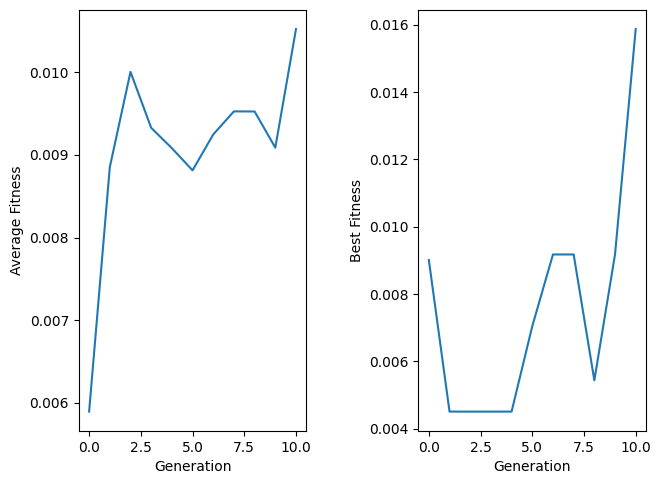

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout(w_pad=5)

ax1.plot(avg_fitness)
ax1.set_ylabel('Average Fitness')
ax1.set_xlabel('Generation')

ax2.plot(bests_fitness)
ax2.set_ylabel('Best Fitness')
ax2.set_xlabel('Generation')